In [121]:
###RMSF
import pandas as pd
RMSF=pd.ExcelFile('RMSF.xlsx')
sheets = RMSF.sheet_names
data_frame = dict()
Stored_data= list()
for i in range(len(sheets)):
    data_frame[i] = pd.read_excel('RMSF.xlsx', sheet_name = i)
    data_frame[i].rename(columns={'AtomicFlx':str(sheets[i])}, inplace=True)
    Stored_data.append(data_frame[i])
#done this part
#Big_RMSF is a part to help store each sheet information into a list of dataframes
from functools import reduce
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['#Res'],
                                            how='outer'),Stored_data)

df_merged.to_excel('Combined_RMSF.xlsx')

#This is to get data for heat-map
##RMSF plot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
#library(circlize)
#df_merged=pd.read_excel('Combined_RMSF.xlsx',sheet_name='ACE2')
plt.figure(figsize = (50,45))
#colormap =sns.palplot(sns.color_palette("Greys"))
#colormap = sns.color_palette('coolwarm')
ax = sns.heatmap(df_3,vmin=1, vmax=3,cmap="YlGnBu")
#sns.heatmap(x, cmap=cmap)
plt.title("Heatmap of ACE2 receptor across the variants",fontsize=70)
plt.xlabel('Variants',fontsize=50)
subjects=df_merged['#Res'].tolist()
plt.yticks(ticks=np.arange(len(subjects)),labels=subjects,fontsize=8)
plt.xticks(fontsize=25)
#row_labels =list(range(319,547))
plt.ylabel('ACE2 receptor residue number',fontsize=50)
#lgd = Legend(title = "foo",fontsize=20)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=40)
plt.savefig('Heatmap_ACE2_N501StoY505D.png')
    

In [4]:
#RMSD Average Deviation
#compute rmsd average deviation for the last 50ns and plot 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
RMSD=pd.read_excel('200ns_RMSD.xlsx',sheet_name=None)
RMSD_file=pd.ExcelFile('200ns_RMSD.xlsx')
import statistics
sheets=RMSD_file.sheet_names
Mutation_name = []
last50ns_avedev_RMSD=[]

for i in sheets :
    Mutation_name.append(i)
    last50ns_avedev_RMSD.append(round(RMSD[i]['RMSD'].loc[2999:3999].mad(),3))

mean_std=pd.DataFrame({'Mutation':Mutation_name,'150-200ns_avedev_RMSD':last50ns_avedev_RMSD })

mean_std=pd.read_excel('Average_deviation.xlsx')
plt.figure(figsize = (45,25))
plt.xticks(rotation = 100,fontsize=18)
graph=sns.scatterplot(mean_std['Mutation'],mean_std['50-100ns_avedev_RMSD'],s=300,color='blue',label='50-100ns RMSD average deviation')
sns.scatterplot(mean_std['Mutation'],mean_std['100-150ns_avedev_rmsd'],s=400,color='red',marker="v",label='100-150ns RMSD average deviation')
sns.scatterplot(mean_std['Mutation'],mean_std['150-200ns_avedev_RMSD'],s=850,color='black',marker="*",label='150-200ns RMSD average deviation')

plt.title('Average deviation of RMSD across variants',fontsize=55)
plt.xlabel('Mutation',fontsize=45)
plt.ylabel('RMSD(Å)',fontsize=45)
plt.yticks(fontsize=45)
plt.xticks(fontsize=20)
plt.ylim(0,0.8)
plt.legend()
graph.axhline(0.3, linewidth='2.5',color='black')
plt.legend(loc ="upper left", prop={'size': 40})
#plt.savefig('Last40ns_average_deviation(first 51 variants).pdf',bbox_inches = 'tight')
plt.show()


IndexError: list index out of range

<Figure size 432x288 with 0 Axes>

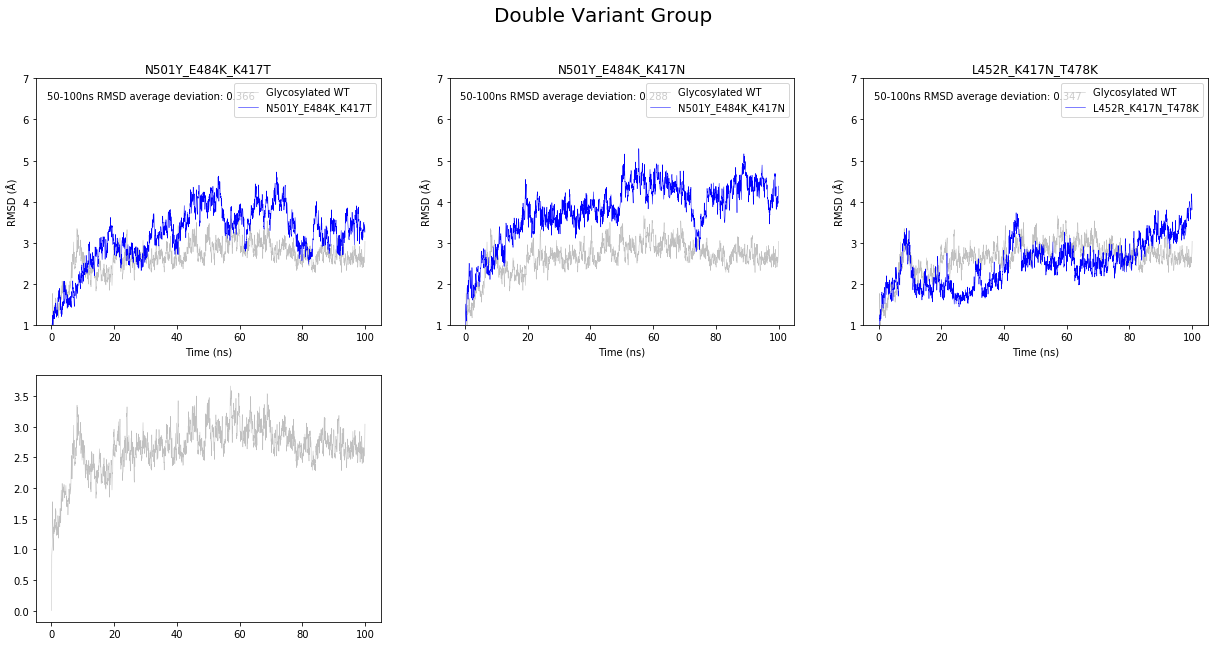

In [43]:
##RMSD
##Plot RMSD 
###RMSD plot for whole dataframe (100ns)
#RMSD plot
#grouping
import numpy as np
import matplotlib.pyplot as plt
group_1=['A475V','A475T','E471G','E484A','E484Q','E484K','F456L','F490V','F490L','F490S','G476S','G485R','G485V','K458N','L452M','L452R','L455F','N481K','P479S','P479L','Q493E','Q493H','S477I','S477N','S477G','S477K','S477R','S494D','S494P','S494T','S494L','T470N','T470K','T478I','T478K','T478R','V483F','Y453F']
group_2=['A520S','A522P','A522S','A522V','E516Q','F338L','G339S','L335F','N334K','P330S','P384S','P384L','P521R','P521L','R357K','S359N','V327I','V362F','V382L']
group_3=['A344S','A348S','A352S','D427N','E406D','G413R','I410V','I468T','K417T','K417R','K417N','L461F','N354S','R346S','R346I','R403K','R408K']
group_4=['G446V','G496S','G502V','G504Q','K537R','N439K','N501S','N501D','N501Y','N501T','N532T','P499L','S373L','T500A','V445A','V503I','V534F','V534I','V534A','Y449H','Y505D']
double_mutant_group=['E484K_S477N','L452Q_F490S','L452R_E484Q','L452R_T478K','N501Y_E484K','N501Y_K417N','N501Y_L452R']
triple_mutant_group=['N501Y_E484K_K417T','N501Y_E484K_K417N','L452R_K417N_T478K'] 
len(triple_mutant_group)
all_total=group_1+group_2+group_3+group_4+double_mutant_group+triple_mutant_group


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

RMSD=pd.read_excel('100ns_RMSD.xlsx',sheet_name=None)
RMSD_file=pd.ExcelFile('100ns_RMSD.xlsx')
sheets=triple_mutant_group

n = 6
for i in range(len(sheets)):
    
    fig = plt.figure() # create the canvas for plotting
    fig.subplots_adjust(hspace =10.0, wspace=10.0)
    fig= plt.subplots(figsize=(21, 10))
    plt.suptitle("Double Variant Group", size=20) 
    
    counts=0
    if i % n == 0:
        
        ax1 = plt.subplot(2,3,1)
        ax1.plot(((RMSD['Glycosylated_WT']['Frame'])*0.05), RMSD['Glycosylated_WT']['RMSD'],label='Glycosylated WT',color='silver',linewidth=0.5)
        ax1.plot(((RMSD[sheets[i]]['Frame'])*0.05), RMSD[sheets[i]]['RMSD'],label=str(sheets[i]),color='blue',linewidth=0.5)
        ax1.set_title(str(sheets[i]))
        ax1.set_ylim(1, 7.0)
        ax1.set(title=str(sheets[i]), xlabel='Time (ns)', ylabel='RMSD (Å)')
        ax1.legend(loc="upper right")
        ax1.text(-1.5,6.5,'50-100ns RMSD average deviation: '+ str(round(RMSD[sheets[i]]['RMSD'].loc[999:1999].mad(),3)))
# (2,1,1) indicates total number of rows, columns, and figure number respectively

        ax2 = plt.subplot(2,3,2)
        ax2.plot(((RMSD['Glycosylated_WT']['Frame'])*0.05), RMSD['Glycosylated_WT']['RMSD'],label='Glycosylated WT',color='silver',linewidth=0.5)
        ax2.plot(((RMSD[sheets[i+1]]['Frame'])*0.05), RMSD[sheets[i+1]]['RMSD'],label=str(sheets[i+1]),color='blue',linewidth=0.5)
        ax2.set_title(str(sheets[i+1]))
        ax2.set_ylim(1, 7.0)
        ax2.set(title=str(sheets[i+1]), xlabel='Time (ns)', ylabel='RMSD (Å)')
        ax2.legend(loc="upper right")
        ax2.text(-1.5,6.5,'50-100ns RMSD average deviation: '+ str(round(RMSD[sheets[i+1]]['RMSD'].loc[999:1999].mad(),3)))
        
        
        ax3 = plt.subplot(2,3,3)
        ax3.plot(((RMSD['Glycosylated_WT']['Frame'])*0.05), RMSD['Glycosylated_WT']['RMSD'],label='Glycosylated WT',color='silver',linewidth=0.5)
        ax3.plot(((RMSD[sheets[i+2]]['Frame'])*0.05), RMSD[sheets[i+2]]['RMSD'],label=str(sheets[i+2]),color='blue',linewidth=0.5)
        ax3.set_title(str(sheets[i+2]))
        ax3.set_ylim(1, 7.0)
        ax3.set(title=str(sheets[i+2]), xlabel='Time (ns)', ylabel='RMSD (Å)')
        ax3.legend(loc="upper right")
        ax3.text(-1.5,6.5,'50-100ns RMSD average deviation: '+ str(round(RMSD[sheets[i+2]]['RMSD'].loc[999:1999].mad(),3)))
        
        
        ax4= plt.subplot(2,3,4)
        ax4.plot(((RMSD['Glycosylated_WT']['Frame'])*0.05), RMSD['Glycosylated_WT']['RMSD'],label='Glycosylated WT',color='silver',linewidth=0.5)
        ax4.plot(((RMSD[sheets[i+3]]['Frame'])*0.05), RMSD[sheets[i+3]]['RMSD'],label=str(sheets[i+3]),color='blue',linewidth=0.5)
        ax4.set_title(str(sheets[i+3]))
        ax4.set_ylim(1, 7.0)
        ax4.set(title=str(sheets[i+3]), xlabel='Time (ns)', ylabel='RMSD (Å)')
        ax4.legend(loc="upper right")
        ax4.text(-1.5,6.5,'50-100ns RMSD average deviation: '+ str(round(RMSD[sheets[i+3]]['RMSD'].loc[999:1999].mad(),3)))
      
        
        ax5= plt.subplot(2,3,5)
        ax5.plot(((RMSD['Glycosylated_WT']['Frame'])*0.05), RMSD['Glycosylated_WT']['RMSD'],label='Glycosylated WT',color='silver',linewidth=0.5)
        ax5.plot(((RMSD[sheets[i+4]]['Frame'])*0.05), RMSD[sheets[i+4]]['RMSD'],label=str(sheets[i+4]),color='blue',linewidth=0.5)
        ax5.set_title(str(sheets[i+4]))
        ax5.set_ylim(1, 7.0)
        ax5.set(title=str(sheets[i+4]), xlabel='Time (ns)', ylabel='RMSD (Å)')
        ax5.legend(loc="upper right")
        ax5.text(-1.5,6.5,'50-100ns RMSD average deviation: '+ str(round(RMSD[sheets[i+4]]['RMSD'].loc[999:1999].mad(),3)))
        
        ax6= plt.subplot(2,3,6)
        ax6.plot(((RMSD['Glycosylated_WT']['Frame'])*0.05), RMSD['Glycosylated_WT']['RMSD'],label='Glycosylated WT',color='silver',linewidth=0.5)
        ax6.plot(((RMSD[sheets[i+5]]['Frame'])*0.05), RMSD[sheets[i+5]]['RMSD'],label=str(sheets[i+5]),color='blue',linewidth=0.5)
        ax6.set_title(str(sheets[i+5]))
        ax6.set_ylim(1, 7.0)
        ax6.set(title=str(sheets[i+5]), xlabel='Time (ns)', ylabel='RMSD (Å)')
        ax6.legend(loc="upper right")
        ax6.text(-1.5,6.5,'50-100ns RMSD average deviation: '+ str(round(RMSD[sheets[i+5]]['RMSD'].loc[999:1999].mad(),3)))
        
      
        plt.savefig("RMSD_{0}.pdf".format(i))
    counts+=1
        
    